<h2>Лаб. робота №1</h2></br>
<h3>студентки групи МІТ_31</h3></br>
<h2>Агафонової Мирослави</h2>

The data set includes three iris species with 50 samples each as well as some properties about each flower.

In this notebook I will explain How to effectively use logistic regression to solve classification problems. I will try to explain each and every step in a concise and clear manner. we will go through the following, step by step:

<ul><li><a>Reading and understanding the data</a></li>
<li><a>Data visualization and explanatory data analysis</a></li>
<li><a>Feature engineering: Data prep for the model</a></li>
<li><a>Model building</a></li>
<li><a>Model evaluation</a></li>
<li><a>Model optimization: hyper parameter tuning</a></li>
<li><a>Model re-evaluation</a></li></ul>

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visuals
import seaborn as sns # advanced visuals

import warnings # ignore warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("./practice1_data.csv")#read file
df.head()#display data


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,classes
0,2.163950,0.015729,-1.136593,2.182571,-1.552051,-0.909067,1.791084,-1.094894,0.308272,-0.912365,0
1,1.364464,-1.359741,-1.881798,-0.484231,-1.974301,-0.017010,2.184909,-1.012308,-0.774774,-3.702803,0
2,1.237133,0.945965,-0.008633,0.889645,0.348132,-1.863290,-1.093229,0.057705,1.646754,-0.834884,2
3,0.530019,2.739019,1.168152,-0.182967,-0.313546,1.274500,1.097952,-0.909685,1.490564,2.300722,1
4,-1.169403,-0.387841,0.049067,-2.136358,-1.839488,-0.635955,-0.136341,0.357952,-0.376029,-2.323494,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x1       1500 non-null   float64
 1   x2       1500 non-null   float64
 2   x3       1500 non-null   float64
 3   x4       1500 non-null   float64
 4   x5       1500 non-null   float64
 5   x6       1500 non-null   float64
 6   x7       1500 non-null   float64
 7   x8       1500 non-null   float64
 8   x9       1500 non-null   float64
 9   x10      1500 non-null   float64
 10  classes  1500 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 129.0 KB


The dataframe has 150 non-null values. It has 6 variables, all of them are in the right data type. the first variable "Id" seems to be redundant and unnecessary for the our analysis, we can drop it and keep the rest of variables.

In [6]:
# summary statistics
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,classes
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.550329,-0.275385,-0.383910,-0.017770,-0.044157,0.042072,0.056311,-0.244578,-0.083342,0.524397,1.497333
std,1.489842,1.711574,1.390968,0.976437,1.003190,1.013082,1.560251,1.594473,1.623737,1.558246,1.117807
min,-4.857101,-5.631583,-4.554755,-3.402785,-3.620247,-3.667087,-4.975684,-4.642937,-5.973969,-4.764986,0.000000
25%,-0.437339,-1.423198,-1.364413,-0.631979,-0.682299,-0.644789,-1.112853,-1.338483,-1.167791,-0.475189,0.000000
50%,0.601106,-0.427568,-0.462918,0.009628,-0.045481,0.057803,-0.064162,-0.432473,-0.119206,0.593918,1.000000
75%,1.566922,0.800646,0.522196,0.625042,0.660479,0.752421,1.215963,0.844740,0.886031,1.538664,2.000000
max,5.147879,5.616177,4.930330,3.357813,3.626218,3.363034,4.344007,6.598312,6.945688,5.798377,3.000000


From the summary statistics we can notice that Sepal leafs are wider and longer than Petal lefs, this can be clearly demonstrated in the following image:

<img src="https://camo.githubusercontent.com/bcac78725cbb1cc1c01073b9398677f099bfa2d6/68747470733a2f2f7777772e696e74656772617465646f74732e636f6d2f77702d636f6e74656e742f75706c6f6164732f323031392f30362f697269735f706574616c2d736570616c2d65313536303231313032303436332e706e67">

In [7]:
# How many species in our dataframe?
# is the data balanced?
df["classes"].value_counts()

0    376
2    376
1    375
3    373
Name: classes, dtype: int64

The data is clean and balanced with exactly the same number of flowers per species: 50 flowers. but why do we care about the balance between number of observations per class?

Imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class.

For example, an imbalanced multiclass classification problem may have 80 percent examples in the first class, 18 percent in the second class, and 2 percent in a third class.

The minority class is harder to predict because there are few examples of this class, by definition. This means it is more challenging for a model to learn the characteristics of examples from this class, and to differentiate examples from this class from the majority class (or classes).

This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class.

More detailed explanation can be found here.

<h2>Data visualization and explanatory data analysis</h2>
This section focuses on how to produce and analyze charts that meets the best practices in both academia and industry. we will try to meet the following criteria in each graph:
<ol>
<li><b>Chose the right graph that suits the variable type:</b> to display the distribution of categorical variables we might opt for count or bar plot. As for continuous variables we might go with a histogram. If we wan to study the distribution of a continuous variable per each calss of other categorical variable we can use a box plots or a kde plot with hue parameter... etc.</li>
<li><b>Maximize Dagt-Ink Ration:</b> it equals to the ink used to display the data devided by the total ink used in the graph. Try not to use so many colors without a good reason for that. Aviod using backround colors, or borders or any other unnecessary decorations.</li>
<li><b>Use clear well written Titles, labels, and tick marks.</b></li>
</ol>

>
</ol>

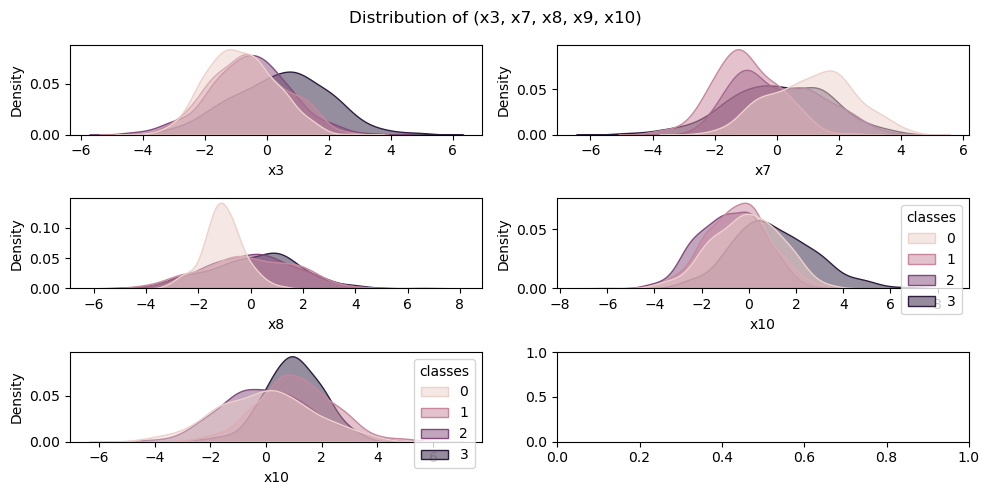

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(10,5), dpi = 100)
fig.suptitle('Distribution of (x3, x7, x8, x9, x10)')

# Distribution of sepal length per classes
sns.kdeplot(ax = axes[0,0], data = df, x = 'x3', hue = "classes", alpha = 0.5, shade = True)
axes[0,0].set_xlabel("x3")
axes[0,0].get_legend().remove()

# Distribution of sepal width per classes
sns.kdeplot(ax = axes[0,1], data = df, x = 'x7', hue = "classes", alpha = 0.5, shade = True)
axes[0,1].set_xlabel("x7")
axes[0,1].get_legend().remove()

# Distribution of petal length per classes
sns.kdeplot(ax = axes[1,0], data = df, x = 'x8', hue = "classes", alpha = 0.5, shade = True)
axes[1,0].set_xlabel("x8")
axes[1,0].get_legend().remove()

# Distribution of petal width per classes
sns.kdeplot(ax = axes[1,1], data = df, x = 'x9', hue = "classes", alpha = 0.5, shade = True)
axes[1,1].set_xlabel("x9")

# Distribution of petal width per classes
sns.kdeplot(ax = axes[2,0], data = df, x = 'x10', hue = "classes", alpha = 0.5, shade = True)
axes[1,1].set_xlabel("x10")

plt.tight_layout()


<b>Main conclusions from the graph:</b>
<ol>
<li>Setosa is easily separable from the other species, this means that the model will be able to classify it accurately.</li>
<li>Petal length and width is expected to be better predictors of Species than Sepal lenght and width.</li>
</ol>
Both conclusions can be demonstrated in the following picture where Setosa is clearly different from other sepcies especially when it comes to its petal leefs, it has a very small sepal width and length comapred to other species.

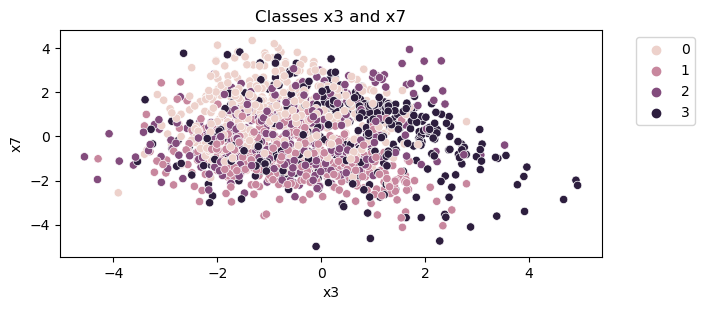

In [9]:
# Scatter plot od petal length vs petal width
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'x3', y = 'x7', hue = "classes")
plt.title("Classes x3 and x7")
plt.xlabel("x3")
plt.ylabel("x7")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

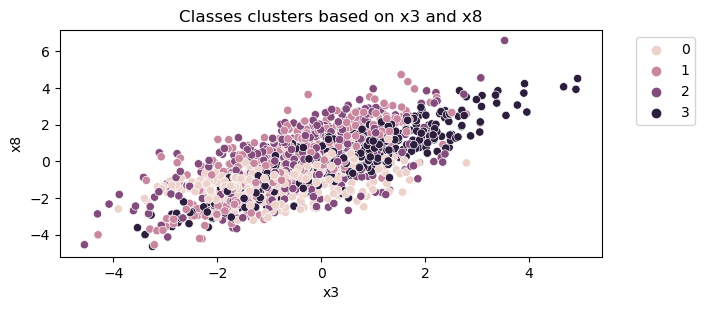

In [10]:
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'x3', y = 'x8', hue = "classes")
plt.title("Classes clusters based on x3 and x8")
plt.xlabel("x3")
plt.ylabel("x8")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

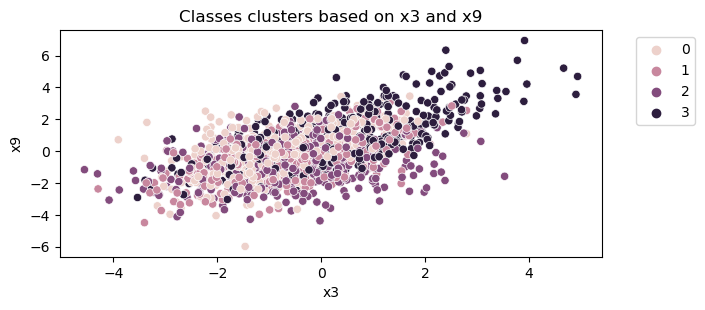

In [11]:
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'x3', y = 'x9', hue = "classes")
plt.title("Classes clusters based on x3 and x9")
plt.xlabel("x3")
plt.ylabel("x9")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

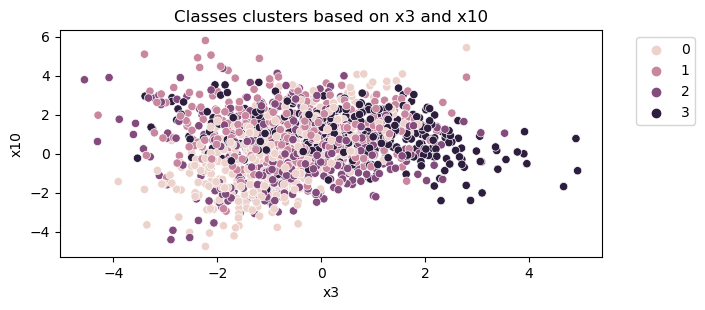

In [12]:
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'x3', y = 'x10', hue = "classes")
plt.title("Classes clusters based on x3 and x10")
plt.xlabel("x3")
plt.ylabel("x10")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

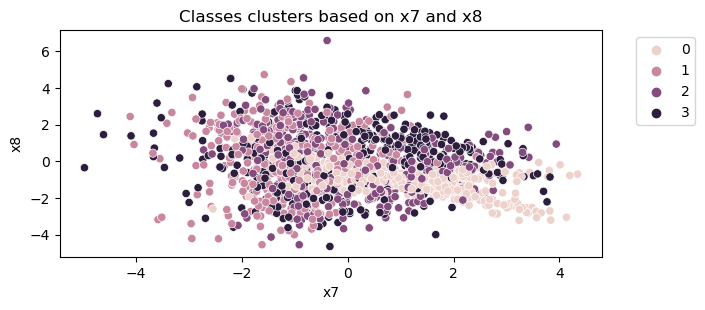

In [13]:
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'x7', y = 'x8', hue = "classes")
plt.title("Classes clusters based on x7 and x8")
plt.xlabel("x7")
plt.ylabel("x8")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

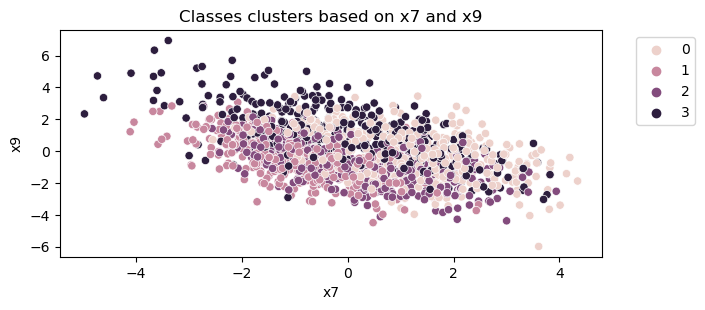

In [14]:
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'x7', y = 'x9', hue = "classes")
plt.title("Classes clusters based on x7 and x9")
plt.xlabel("x7")
plt.ylabel("x9")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

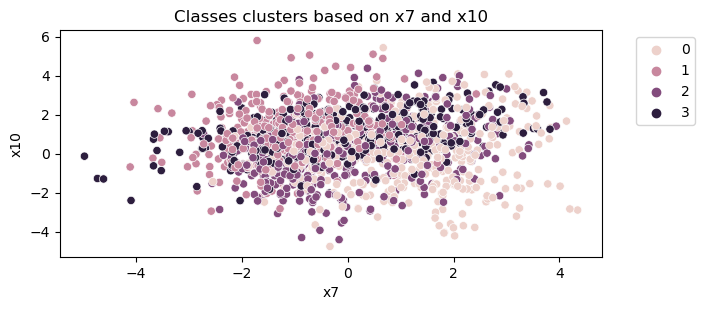

In [15]:
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'x7', y = 'x10', hue = "classes")
plt.title("Classes clusters based on x7 and x10")
plt.xlabel("x7")
plt.ylabel("x10")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

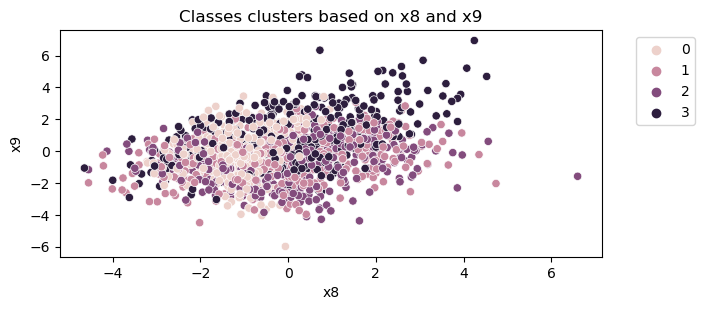

In [16]:
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'x8', y = 'x9', hue = "classes")
plt.title("Classes clusters based on x8 and x9")
plt.xlabel("x8")
plt.ylabel("x9")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

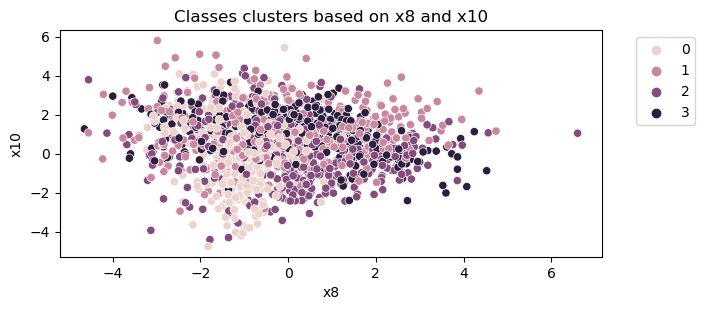

In [17]:
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'x8', y = 'x10', hue = "classes")
plt.title("Classes clusters based on x8 and x10")
plt.xlabel("x8")
plt.ylabel("x10")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

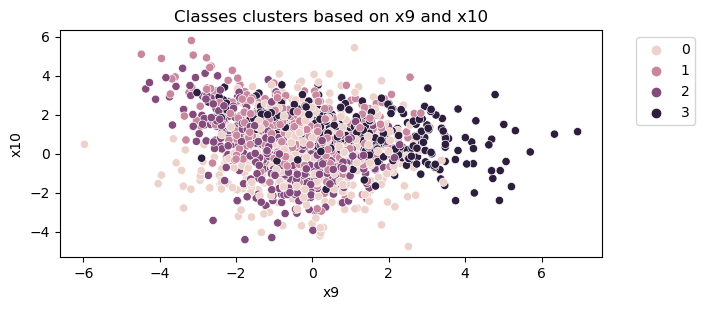

In [18]:
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'x9', y = 'x10', hue = "classes")
plt.title("Classes clusters based on x9 and x10")
plt.xlabel("x9")
plt.ylabel("x10")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

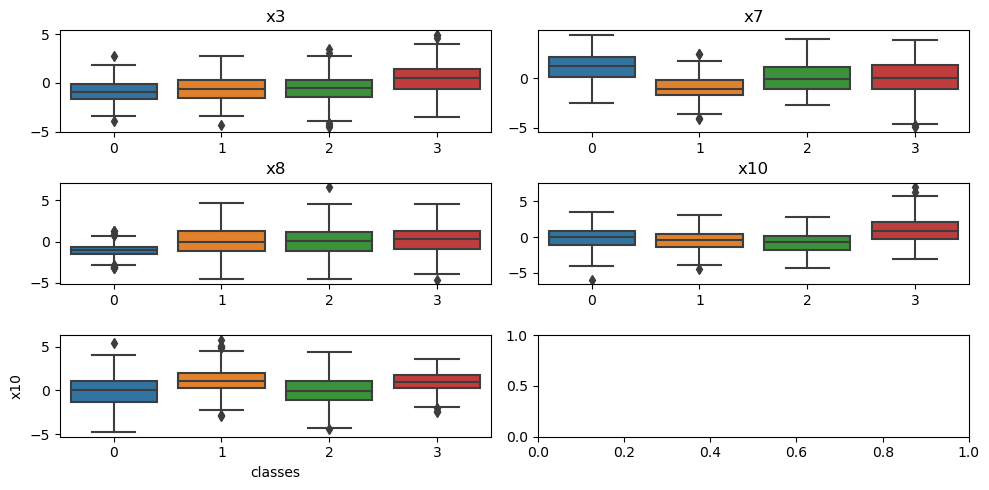

In [19]:
#box plots
fig, axes = plt.subplots(3, 2, figsize=(10,5), dpi = 100)

#x3
sns.boxplot(ax = axes[0,0], data = df, x = "classes", y = 'x3')
axes[0,0].set_xlabel(None)
axes[0,0].set_ylabel(None)
axes[0,0].set_title("x3")


#x7
sns.boxplot(ax = axes[0,1], data = df, x = "classes", y = 'x7')
axes[0,1].set_xlabel(None)
axes[0,1].set_ylabel(None)
axes[0,1].set_title("x7")

#x8
sns.boxplot(ax = axes[1,0], data = df, x = "classes", y = 'x8')
axes[1,0].set_xlabel(None)
axes[1,0].set_ylabel(None)
axes[1,0].set_title("x8")

#x9
sns.boxplot(ax = axes[1,1], data = df, x = "classes", y = 'x9')
axes[1,1].set_xlabel(None)
axes[1,1].set_ylabel(None)
axes[1,1].set_title("x9")

#x10
sns.boxplot(ax = axes[2,0], data = df, x = "classes", y = 'x10')
axes[1,1].set_xlabel(None)
axes[1,1].set_ylabel(None)
axes[1,1].set_title("x10")

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

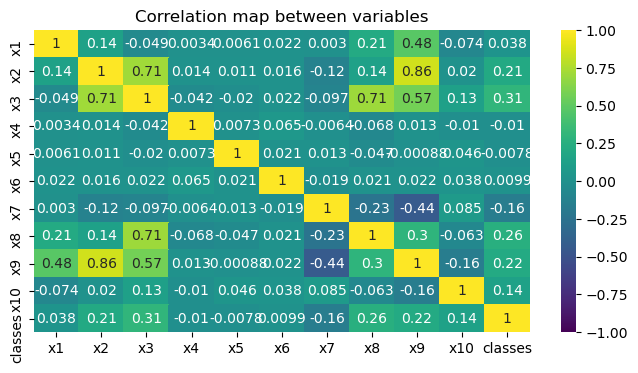

In [20]:
# Correlation map
plt.figure(figsize = (8, 4), dpi = 100)
sns.heatmap(df.corr(), annot = True, cmap = "viridis", vmin = -1, vmax = 1)
plt.title("Correlation map between variables")
#plt.xticks(rotation = 90)
plt.show()


Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It's a common tool for describing simple relationships without making a statement about cause and effect.

Correlation coefficient ranges between -1 (perfect negative correlation) and 1 (perfect positive correlation). As you can notice, there is a strong positive correlation between petal width and length on one hand and sepal length on the other hand.
<h2>
Feature engineering: Data prep for the model</h2>
In this section we will make sure that the data is well prepared for training the model. We will:
<ol>
<li>Seprate the dependent variable from the independent ones.</li>
<li>Perform a train test split</li>
<li>Scale the data (feature scaling).</li>
</ol>

In [21]:
# 1. Seprate the dependent variable from the independent ones.

X = df.drop("classes", axis = 1)
y = df["classes"]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
Scaled_X_train = scaler.fit_transform(X_train)
Scaled_X_test = scaler.transform(X_test)

In [24]:
# Logestic Regression 
from sklearn.linear_model import LogisticRegression # import the classifier
log_model = LogisticRegression() #initiate it
log_model.fit(Scaled_X_train, y_train) #fit the model to the training data

LogisticRegression()

<h2>Model evaluation</h2>
First we will make predictions using the model on the test data, and then evaluate its performance using the following metrics:
<ol>
<li>Confusion matrix: A summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. Here is an example of a confusion matrix:
</li>
<li>Accuracy score: the fraction of predictions our model got right (number of correct predictions devided by total number of predictions).</li>
<li>Classification report: used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. The report shows the main classification metrics precision, recall and f1-score on a per-class basis. Precision: What percent of your predictions were correct? - Recall: What percent of the positive cases did you catch? - F1 score: What percent of positive predictions were correct?.</li>
</ol>

In [25]:
y_pred = log_model.predict(Scaled_X_test)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

In [27]:
confusion_matrix(y_test, y_pred)

array([[46,  4, 10, 14],
       [ 2, 56, 13,  2],
       [ 5, 17, 41,  5],
       [16, 12,  3, 54]], dtype=int64)

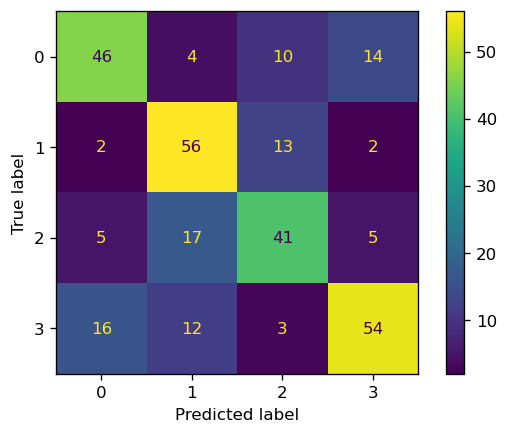

In [28]:
fig, ax = plt.subplots(dpi = 120)
plot_confusion_matrix(log_model, Scaled_X_test, y_test, ax = ax);

In [29]:
acc_score = accuracy_score(y_test, y_pred)
round(acc_score, 2)

0.66

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.62      0.64        74
           1       0.63      0.77      0.69        73
           2       0.61      0.60      0.61        68
           3       0.72      0.64      0.67        85

    accuracy                           0.66       300
   macro avg       0.66      0.66      0.65       300
weighted avg       0.66      0.66      0.66       300

